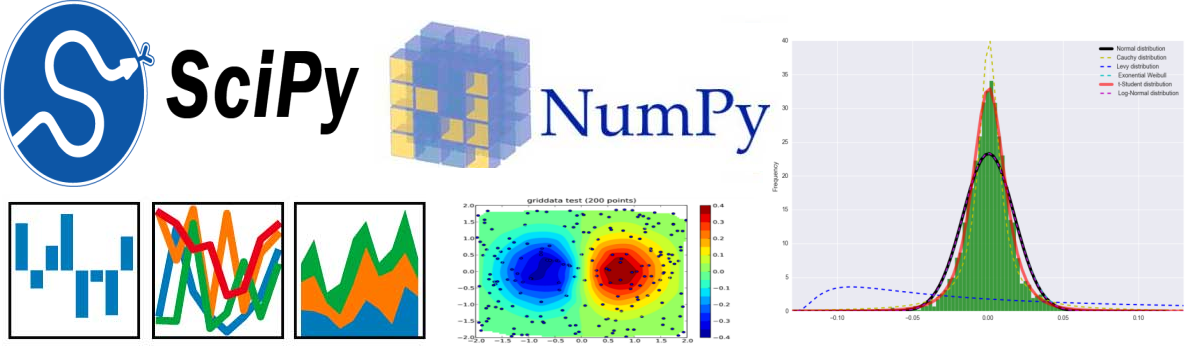
##03. Statistical Distributions!
SciPy contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Populations

In a statistical mindset we respond questions about **populations** rather than about individuals.

**Questions about individuals**
- What is the distance reached by a cannonball fired with a certain angle, force, wind resistance, etc.?
- At what time will this machine fail?

**Questions about populations**
- What is the probability of observing a petal longer than 5cm?
- If I see a sepal 3cm long is it more likely for it to belong to the setosa,versicolor or virginica species?


Sometimes it is not possible to reason about individuals. Maybe we do not have an accurate model about their behavior, the world is instrinsically noisy, etc.

# Distributions

The distribution provides a parameterized mathematical function that can be used to calculate the probability from a observable population. A distribution is a general description of a certain characteristic of a population (for instance, trilobite length).

- Sometimes we are given the exact distribution that a population follows (iris-setosa petal lengths follow a truncated normal distribution between 1.0 and 1.9 cm)
- Sometimes we are given a sample of a population and that is all we have to answer questions.

-** Random variables**  is a function that assign values (measures) to a random phenomenon, i.e., the  possible values are outcomes of a random phenomenon. ***Variables that vary due to chance***

### Some typical known distributions

Certain processes yield populations with well known distributions.

- A uniform distribution where each value within a certain range is equally likely to occur
- A normal (gaussian) distribution appears very commonly in nature with continuous values.
- A Poisson distribution  expresses the probability of a given number of events occurring in a fixed interval of time.
- A Bernoulli distribution describes binary experiments (YES/NO, 0/1, heads/tails, ...)


In [ ]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(iris_url, names=iris_columns)

iris_df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


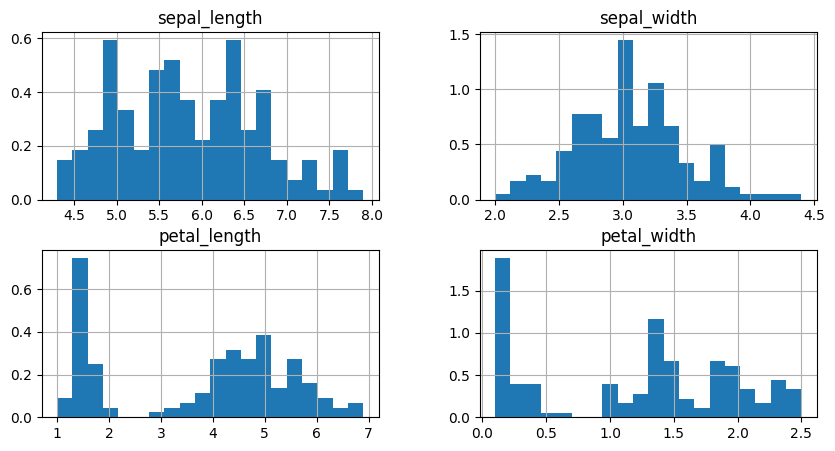

In [ ]:
iris_df.hist(bins=20,  density=True, figsize=(10,5));

##Normal(gaussian)Distribution

Normal (Gaussian) distribution is a fundamental concept in statistics and probability theory, describing how data points are dispersed or spread across the mean. It's a continuous probability distribution characterized by its bell-shaped curve, symmetric about the mean. The distribution is defined by two parameters: the mean (
μ), which indicates the center of the distribution, and the standard deviation (
σ), which determines the width of the distribution. The equation for the probability density function (PDF) of the Normal distribution is:

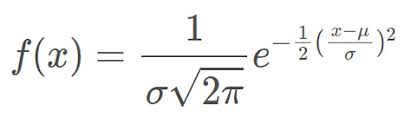



Where:

x represents the variable.

μ is the mean.

σ is the standard deviation.

e is the base of the natural logarithm.

###Properties
Symmetry: The curve is symmetric around the mean, meaning that the mean, median, and mode of the distribution are all equal.

Bell-shaped: The distribution has a distinctive bell-shaped curve, with the majority of the data points concentrated around the mean.

Asymptotic: The tails of the distribution curve approach, but never touch, the horizontal axis. This implies that there are always data points that can exist further away from the mean, albeit with decreasing probability.

Defined by Mean and Standard Deviation: The shape of the distribution is fully specified by its mean and standard deviation. Changing the mean shifts the distribution left or right on the horizontal axis, while changing the standard deviation stretches or compresses the distribution.

Standard Normal Distribution:
When
μ=0 and
σ=1, the Normal Distribution is known as the Standard Normal Distribution.

###Aplication
To apply the concept of a normal (Gaussian) distribution to the Iris dataset, we can look at one of its continuous features, like 'sepal_length', and check if it follows a normal distribution. We'll do this by:

Estimating the mean and standard deviation of 'sepal_length'.
Generating a normal distribution with these parameters.
Comparing the distribution of our data to the theoretical normal distribution using a histogram and a probability density function (PDF) plot.

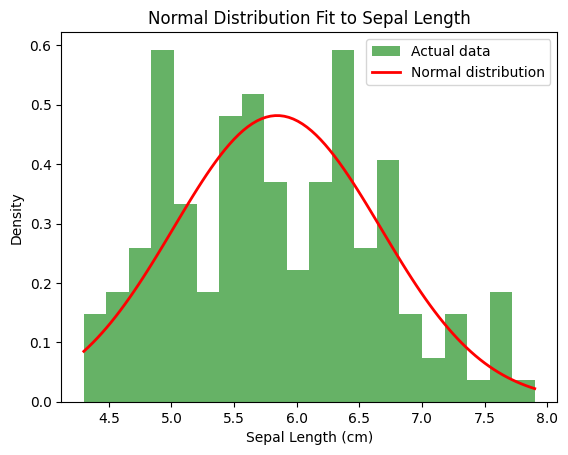

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


# Step 1: Estimate the parameters (mean and standard deviation) of 'sepal_length'
mean_sepal_length = np.mean(iris_df['sepal_length'])
std_sepal_length = np.std(iris_df['sepal_length'], ddof=1)

# Step 2: Generate a normal distribution with these parameters
norm_dist = stats.norm(loc=mean_sepal_length, scale=std_sepal_length)

# Step 3: Compare the distribution of our data to the theoretical normal distribution
# Create a range of values for plotting the PDF
values = np.linspace(min(iris_df['sepal_length']), max(iris_df['sepal_length']), 100)

# Plot the histogram of 'sepal_length'
plt.hist(iris_df['sepal_length'], bins=20, density=True, alpha=0.6, color='g', label='Actual data')

# Plot the PDF of the estimated normal distribution
plt.plot(values, norm_dist.pdf(values), 'r-', lw=2, label='Normal distribution')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Normal Distribution Fit to Sepal Length')
plt.legend()

plt.show()


##Normal Distribution

The terms "Normal Distribution" and "Gaussian Distribution" refer to the same statistical distribution and are often used interchangeably. This distribution is one of the most important and widely used probability distributions in statistics due to its natural occurrence in many situations.

To illustrate how to work with the concept of a uniform distribution and apply it to a feature of the Iris dataset, let's choose 'sepal_length'. We will:

1.Determine the range of 'sepal_length'.
2.Generate samples from a uniform distribution within this range.
3.Plot the histogram of the actual 'sepal_length' data alongside the samples generated from the uniform distribution for comparison.

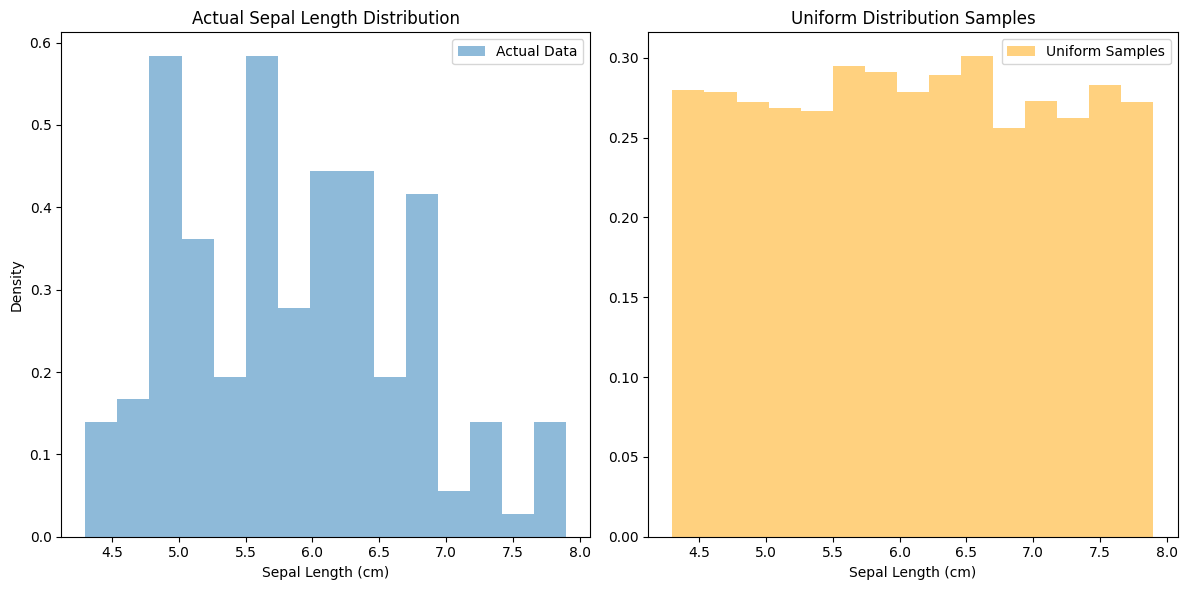

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Calculate the range of 'sepal_length'
min_sepal_length = iris_df['sepal_length'].min()
max_sepal_length = iris_df['sepal_length'].max()

# Generate samples from a uniform distribution within this range
uniform_dist = stats.uniform(loc=min_sepal_length, scale=max_sepal_length - min_sepal_length)
uniform_samples = uniform_dist.rvs(size=10000)

# Plotting
plt.figure(figsize=(12, 6))

# Actual 'sepal_length' histogram
plt.subplot(1, 2, 1)
plt.hist(iris_df['sepal_length'], bins=15, density=True, alpha=0.5, label='Actual Data')
plt.title('Actual Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.legend()

# Uniform distribution samples histogram
plt.subplot(1, 2, 2)
plt.hist(uniform_samples, bins=15, density=True, alpha=0.5, color='orange', label='Uniform Samples')
plt.title('Uniform Distribution Samples')
plt.xlabel('Sepal Length (cm)')
plt.legend()

plt.tight_layout()
plt.show()


It generates a comparison between the actual distribution of 'sepal_length' in the Iris dataset and a theoretical uniform distribution based on the range of 'sepal_length'. This helps illustrate the differences between the actual data distribution and a uniform distribution.

##Poisson Distribution


The Poisson Distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space, assuming that these events occur with a known constant mean rate and independently of the time since the last event. It's a powerful tool for modeling counts of events and has applications across numerous fields such as physics, finance, medicine, and traffic engineering.

###Definition

The Poisson Distribution is defined by a single parameter, λ (lambda), which is the average number of events in the given time interval. This parameter represents both the mean and the variance of the distribution.
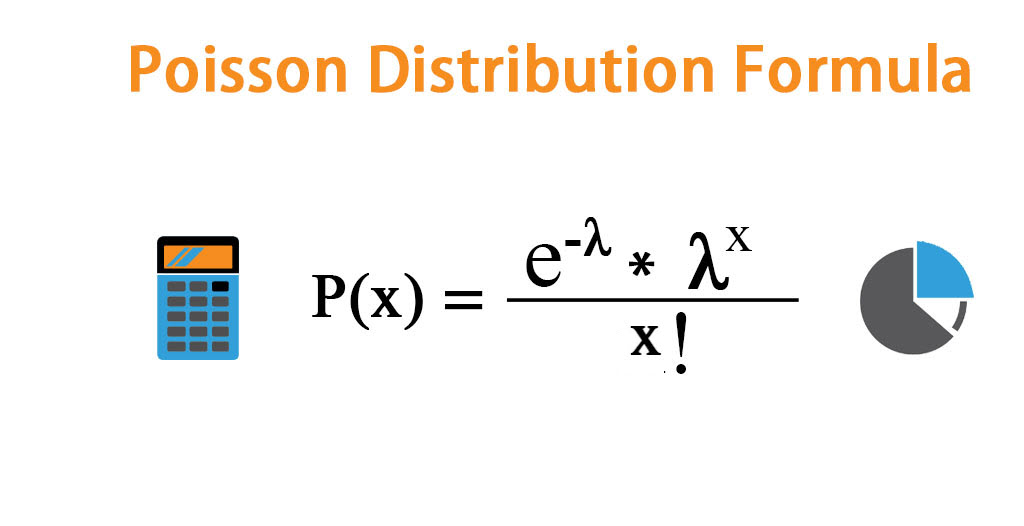
Where:

X is the random variable representing the number of events.

k is a non-negative integer (0, 1, 2, ...).

e is the base of the natural logarithm (approximately equal to 2.71828).

λ is the average number of events per interval.

k! is the factorial of k.

###Properties
Discrete Nature: The Poisson Distribution is discrete, meaning it is used to model events that can be counted in whole numbers.
Interval Independence: The events occur independently of each other. The occurrence of one event does not affect the probability of another event occurring.
Constant Mean Rate: The average rate (
λ) at which events occur is constant throughout the considered interval.
Rare Events: The Poisson Distribution is particularly useful for modeling rare events over short intervals in a large population or time frame.

###Hypothetical Scenario for the Iris Dataset:
Imagine we are studying the occurrence of a specific type of flower anomaly within Iris flowers over a set period, like a year, and we have recorded the number of anomalies found per month.

If we assume:

The average number of anomalies found per month is 3.
We can model this scenario using a Poisson distribution to understand the probability of finding a certain number of anomalies in any given month.

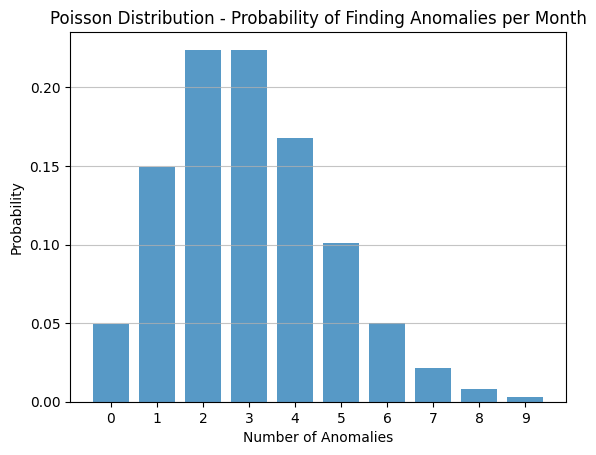

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Hypothetical average rate (lambda) of anomalies found per month
lambda_anomalies = 3

# Generate Poisson distribution for the range of possible counts of anomalies
anomaly_counts = np.arange(0, 10)  # Considering 0 to 9 anomalies as our range of interest
probabilities = poisson.pmf(anomaly_counts, lambda_anomalies)

# Plot the Poisson distribution
plt.bar(anomaly_counts, probabilities, alpha=0.75)
plt.xlabel('Number of Anomalies')
plt.ylabel('Probability')
plt.title('Poisson Distribution - Probability of Finding Anomalies per Month')
plt.xticks(anomaly_counts)
plt.grid(axis='y', alpha=0.75)

plt.show()


##Bernoulli Distribution

The Bernoulli distribution is one of the simplest discrete probability distributions in statistics. It models the outcome of a single experiment or trial that can result in one of two outcomes: success or failure. This distribution is a foundational concept in probability theory and serves as the basis for more complex distributions like the binomial distribution.

Definition
A random variable
X follows a Bernoulli distribution if it can take the value 1 with probability
p and the value 0 with probability
1−p, where
p is the success probability. The distribution is denoted as
X∼Bernoulli(p).

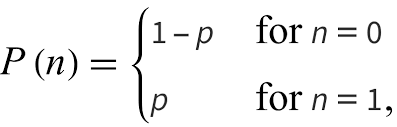

###To illustrate the use of a Bernoulli distribution in a context related to the Iris dataset
We could create a hypothetical binary variable. For example, let's say we want to model the occurrence of irises with a sepal length greater than a certain threshold (say, the mean sepal length) as a "success" and otherwise as a "failure".

Here's how you could approach this:

1.Calculate the mean sepal length.
2.Create a binary variable that indicates whether each iris has a sepal length greater than this mean (1 for greater, 0 for not greater).
3.Model this binary variable using a Bernoulli distribution.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import bernoulli


# 1. Calculate the mean sepal length
mean_sepal_length = np.mean(iris_df['sepal_length'])

# 2. Create a binary variable based on sepal length
iris_df['sepal_length_gt_mean'] = (iris_df['sepal_length'] > mean_sepal_length).astype(int)

# Probability of success (sepal length greater than mean)
p_success = np.mean(iris_df['sepal_length_gt_mean'])

# 3. Model this with a Bernoulli distribution
dist_bernoulli = bernoulli(p_success)

# Generate 10 random variates from this distribution
random_variates = dist_bernoulli.rvs(10)
print("Random variates from the Bernoulli distribution:", random_variates)

# Example: Calculating the probability of getting a sepal length greater than the mean (success)
prob_of_success = dist_bernoulli.pmf(1)
print(f"Probability of a sepal length greater than the mean: {prob_of_success}")


Random variates from the Bernoulli distribution: [0 0 0 0 0 1 0 0 0 1]
Probability of a sepal length greater than the mean: 0.4666666666666667


## Baye's Theorem

Bayes' theorem is a fundamental principle in probability theory and statistics that describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It helps in updating the probability of hypotheses as more evidence or information becomes available.

###Formula of Bayes' Theorem:
Bayes' theorem is mathematically expressed as:


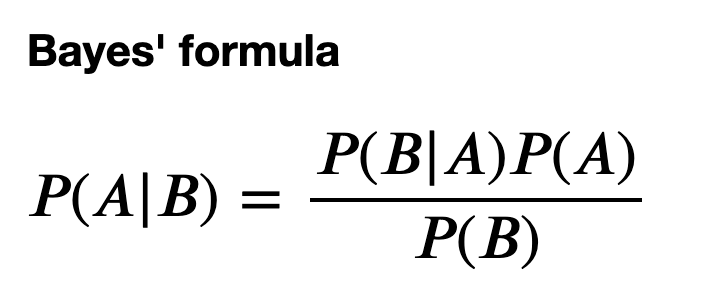
​


where:

P(A∣B) is the posterior probability of
A given B, which is what we want to find out.
P(B∣A) is the likelihood, the probability of
B given A.

P(A) is the prior probability of
A, the initial degree of belief in A.

P(B) is the marginal probability of
B, the total probability of
B occurring under all hypotheses.

###Example:
Imagine you are playing a game with two boxes of balls. Box 1 contains 6 red balls and 4 blue balls. Box 2 contains 1 red ball and 9 blue balls. You choose a box at random and then draw a ball from that box without looking.

Question: If the ball drawn is blue, what is the probability it was drawn from Box 2?

Let
A be the event that a ball is drawn from Box 2.

Let
B be the event that a blue ball is drawn.

In [ ]:
# Calculate the probability using Bayes' Theorem for the given example

# Prior probabilities
P_A = 0.5  # Probability of choosing Box 2
P_not_A = 0.5  # Probability of not choosing Box 2 (choosing Box 1)

# Likelihoods
P_B_given_A = 9/10  # Probability of drawing a blue ball given Box 2 is chosen
P_B_given_not_A = 4/10  # Probability of drawing a blue ball given Box 1 is chosen

# Total probability of drawing a blue ball
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * P_not_A)

# Applying Bayes' Theorem to find P(A|B): Probability of Box 2 given a blue ball is drawn
P_A_given_B = (P_B_given_A * P_A) / P_B

print("The probability that the blue ball is from box2 is:",P_A_given_B)


The probability that the blue ball is from box2 is: 0.6923076923076923


##Iris DF

###What is the probability of fiding a sepal width>4?

In [ ]:
import numpy as np
import pandas as pd

# Calculate and print the mean and standard deviation of the sepal width
mean_sepal_width = np.mean(iris_df['sepal_width'])
std_sepal_width = np.std(iris_df['sepal_width'])

print("Mean of sepal width: {:.3f}".format(mean_sepal_width))
print("Standard deviation of sepal width: {:.3f}".format(std_sepal_width))

# Calculate and print the mean of the boolean series where sepal width is greater than 4
mean_sepal_width_gt_4 = np.mean(iris_df['sepal_width'] > 4)

print("Mean of sepal width > 4: {:.3f}".format(mean_sepal_width_gt_4))

Mean of sepal width: 3.054
Standard deviation of sepal width: 0.432
Mean of sepal width > 4: 0.020


###Average for each group

In [ ]:
# Group the data by 'species' and calculate the average for each group.
average_values = iris_df.groupby('species').mean()

# Print the average values for the sepal length and width, and the petal length and width for each species.
print("Valores Promedio por Especie:")
print(average_values[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


Valores Promedio por Especie:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


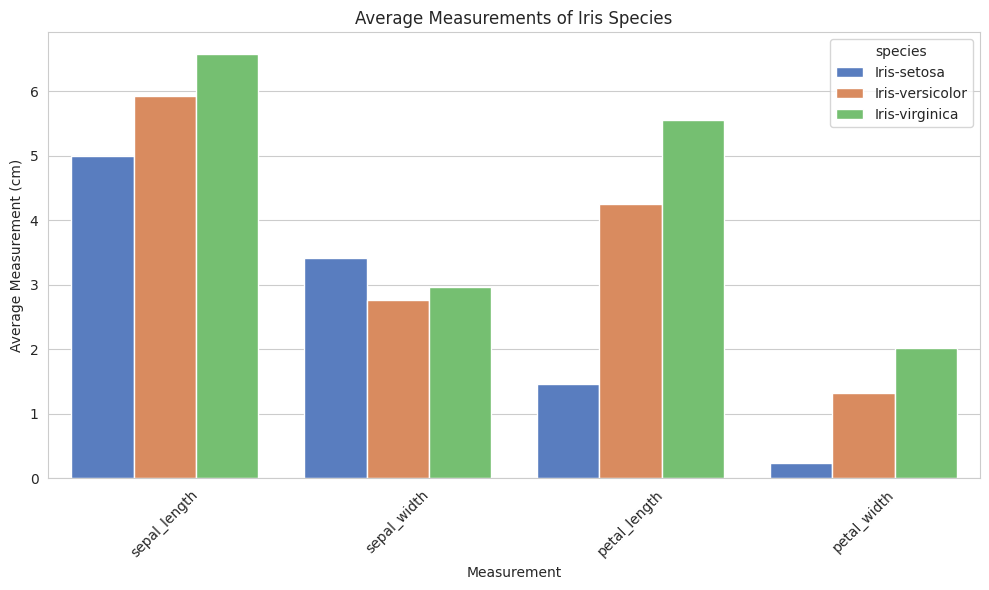

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude the 'sepal_length_gt_mean' column
average_values = average_values.drop(columns=['sepal_length_gt_mean'])

# Now, proceed to melt and plot as before
average_values_melted = average_values.reset_index().melt(id_vars="species", var_name="measurement", value_name="average")

# Continue with the seaborn barplot code
plt.figure(figsize=(10, 6))
sns.barplot(x='measurement', y='average', hue='species', data=average_values_melted, palette="muted")
plt.title('Average Measurements of Iris Species')
plt.xlabel('Measurement')
plt.ylabel('Average Measurement (cm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



###Max and Min Values for each species

In [ ]:

# Print the maximum and minimum values for sepal length and width, and petal length and width for each species
max_values = iris_df.groupby('species').max()
min_values = iris_df.groupby('species').min()

# Group the data by 'species' and calculate the maximum and minimum values for each group
print("Valores Máximos por Especie:")
print(max_values[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print("\nValores Mínimos por Especie:")
print(min_values[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


Valores Máximos por Especie:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               5.8          4.4           1.9          0.6
Iris-versicolor           7.0          3.4           5.1          1.8
Iris-virginica            7.9          3.8           6.9          2.5

Valores Mínimos por Especie:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               4.3          2.3           1.0          0.1
Iris-versicolor           4.9          2.0           3.0          1.0
Iris-virginica            4.9          2.2           4.5          1.4


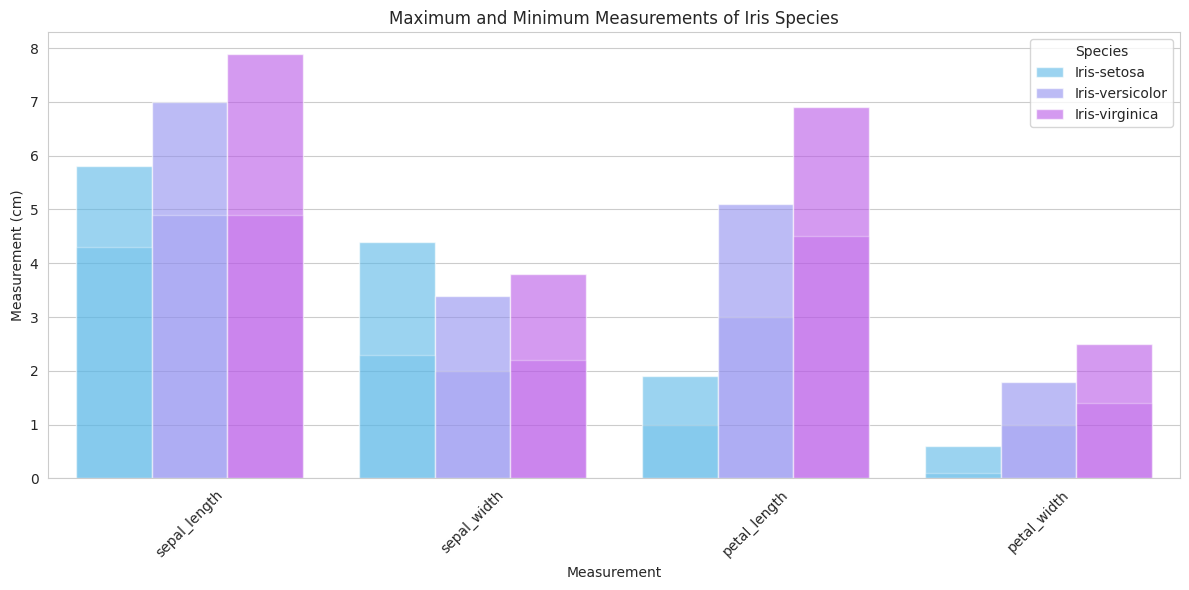

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming max_values and min_values are already defined as per your provided code
# Resetting the index to make 'species' a column again for easier plotting
max_values_reset = max_values.reset_index()
min_values_reset = min_values.reset_index()

# Melting the DataFrames for seaborn compatibility
max_melted = max_values_reset.melt(id_vars="species", var_name="measurement", value_name="max_value")
min_melted = min_values_reset.melt(id_vars="species", var_name="measurement", value_name="min_value")

# Merging the max and min DataFrames for easier plotting
merged_melted = pd.merge(max_melted, min_melted, on=["species", "measurement"])

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the maximum values
max_bars = sns.barplot(x='measurement', y='max_value', hue='species', data=merged_melted, palette="cool", alpha=0.6)

# Plotting the minimum values on top of the maximum values
min_bars = sns.barplot(x='measurement', y='min_value', hue='species', data=merged_melted, palette="cool", alpha=0.3)

plt.title('Maximum and Minimum Measurements of Iris Species')
plt.xlabel('Measurement')
plt.ylabel('Measurement (cm)')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()

# Add legend, remove the automatic labels seaborn might have added, then add your custom labels.
handles, labels = max_bars.get_legend_handles_labels()
plt.legend(handles[0:3], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title='Species', loc='upper right')

plt.show()


#Exercises

##Para estos ejercicios estaremos usando el Dataframe Titanic

In [ ]:
#Import Pandas library
import pandas as pd
#Use the Titanic DataFrame from StanfordUniversity
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
#Reading and printing the first 10 lines of the Dataframes
df = pd.read_csv(url)
df.head(10)



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


##Ejercicio 1: Distribución Normal
Contexto: Supón que quieres investigar la edad de los pasajeros del Titanic y ver si se distribuye normalmente.

Tarea:

Calcula la media y la desviación estándar de la edad de los pasajeros.
Crea un histograma de las edades y superpone la distribución normal teórica basada en la media y la desviación estándar calculadas.
Realiza un test de normalidad (por ejemplo, el test de Shapiro-Wilk) para evaluar si las edades se distribuyen normalmente.


##Ejercicio 2: Teorema de Bayes
Contexto: Estás interesado en encontrar la probabilidad de supervivencia dado que un pasajero es mujer.

Tarea:

Define el evento A como "el pasajero sobrevive" y B como "el pasajero es mujer".
Calcula la probabilidad previa de A, la probabilidad de B y la probabilidad de B dado A.
Aplica el teorema de Bayes para encontrar la probabilidad de A dado B.


##Ejercicio 3: Distribución de Bernoulli
Contexto: Quieres modelar la probabilidad de que un pasajero escogido al azar viaje en primera clase.

Tarea:

Define el "éxito" como un pasajero que viaja en primera clase y "fracaso" como cualquier otra clase.
Calcula la probabilidad de éxito.
Usa esta probabilidad para realizar 10 simulaciones de este experimento Bernoulli y muestra los resultados.


# Linnear Regression TitanicDF

In [ ]:
#Import Pandas library
import pandas as pd
#Use the Titanic DataFrame from StanfordUniversity
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
#Reading and printing the first 10 lines of the Dataframes
titanic_df = pd.read_csv(url)
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
# Import the train_test_split function from the scikit-learn library.
# This function is used to split a dataset into a training set and a testing set.
from sklearn.model_selection import train_test_split

# Select 'Age' as the feature (independent variable) for our linear regression model.
# This step involves creating a new DataFrame with just the 'Age' column from the original DataFrame.
X = df[['Age']]

# Set 'Fare' as the target (dependent variable) for our linear regression model.
# We create a Series containing all the values from the 'Fare' column.
y = df['Fare']

# Split the dataset into training and testing sets using train_test_split.
# 80% of the data will be used for training and 20% for testing.
# The 'random_state' parameter is set to a fixed number to ensure that the split is reproducible it will generate the same split each time the code is run.
# X_train and y_train are the features and target variable for the training set, respectively.
# X_test and y_test are the features and target variable for the testing set, respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Importing the LinearRegression class from scikit-learn's linear_model module.
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression class.
model = LinearRegression()

# Fitting the linear regression model to the training data.
# This involves finding the coefficients for the linear equation that best fits the observed data points.
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Import the mean_squared_error function from scikit-learn's metrics module.
# This function is used to calculate the mean squared error (MSE) of the model's predictions.
from sklearn.metrics import mean_squared_error

# Use the model to predict the values of the dependent variable (y) for the test set (X_test).
# The 'predict' method uses the model trained with the training set to generate predictions for the test set.
predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the actual values of the dependent variable in the test set (y_test)
# and the predicted values (predictions). The MSE is a common metric used to evaluate the performance of regression models,
# measuring the average of the squares of the errors between actual and predicted values. A lower MSE indicates a better fit.
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 1216.463751416491


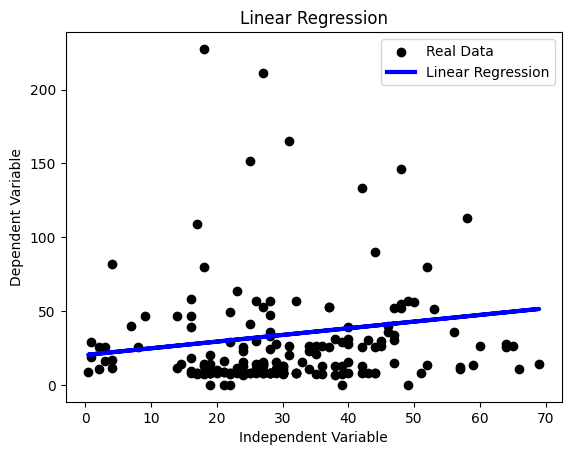

In [ ]:
# Import the matplotlib library's pyplot module, which provides a MATLAB-like plotting framework.
import matplotlib.pyplot as plt

# Create a scatter plot of the test data:
# The X_test data (independent variable) is plotted on the x-axis,
# and the actual y_test data (dependent variable) is plotted on the y-axis.
# The data points are colored black and labeled as 'Real Data'.
plt.scatter(X_test, y_test, color='black', label='Real Data')

# Plot the linear regression line:
# Again, the X_test data (independent variable) is on the x-axis,
# but this time, the predicted values from the linear regression model are on the y-axis.
# The line is colored blue, has a linewidth of 3 for visibility, and is labeled 'Linear Regression'.
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Linear Regression')

# Label the x-axis as 'Independent Variable'.
plt.xlabel('Independent Variable')

# Label the y-axis as 'Dependent Variable'.
plt.ylabel('Dependent Variable')

# Add a title to the plot: 'Linear Regression'.
plt.title('Linear Regression')

# Display a legend to distinguish between the actual data points and the regression line.
plt.legend()

# Show the plot. This command generates the visual output of all the plotting commands above.
plt.show()


#Analyzing each class

MSE for First Class: 3140.1329538528635


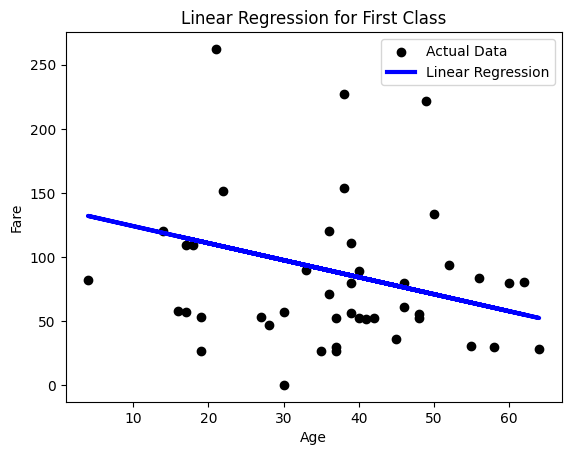

MSE for Second Class: 137.97013692829245


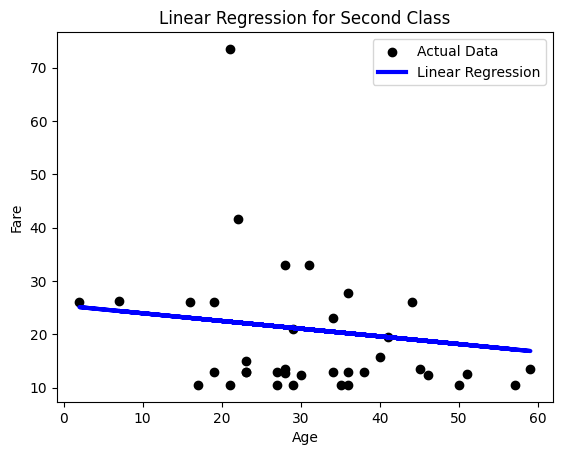

MSE for Third Class: 150.78200098356731


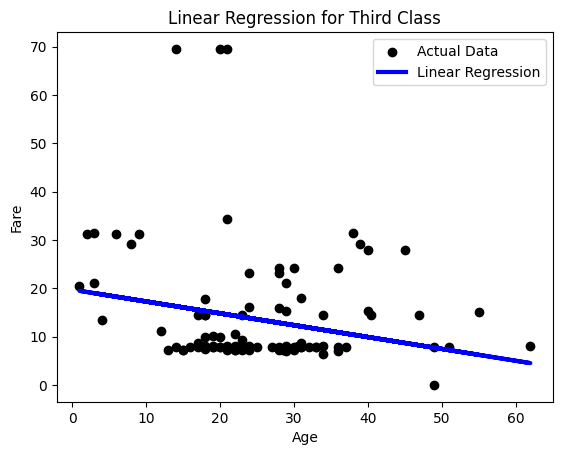

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



df = pd.read_csv(url)

# Separating the dataset into different DataFrames based on 'Pclass'
class_1_df = df[df['Pclass'] == 1]
class_2_df = df[df['Pclass'] == 2]
class_3_df = df[df['Pclass'] == 3]



# Loop through each class DataFrame, fit a model, and print the results
for class_df, class_name in zip([class_1_df, class_2_df, class_3_df], ['First', 'Second', 'Third']):

    class_df = class_df.dropna(subset=['Age', 'Fare'], axis=0)  # Specify axis=0 to drop rows
    # We drop NaN values for simplicity

    # Assuming 'Age' is cleaned and has no NaN values and 'Fare' is the target variable
    # Note: It's important to handle NaN values in 'Age' and 'Fare' before this step
    X = class_df[['Age']]
    y = class_df['Fare']


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an instance of the Linear Regression model
    model = LinearRegression()

    # Train the model using our training set
    model.fit(X_train, y_train)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Calculate and print the Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print(f"MSE for {class_name} Class: {mse}")

    # Plot the results
    plt.scatter(X_test, y_test, color='black', label='Actual Data')
    plt.plot(X_test, predictions, color='blue', linewidth=3, label='Linear Regression')
    plt.xlabel('Age')  # Label for the x-axis
    plt.ylabel('Fare')  # Label for the y-axis
    plt.title(f'Linear Regression for {class_name} Class')  # Title of the plot
    plt.legend()  # Display the legend
    plt.show()


